<div style="font-family:Trebuchet MS; background-color:#dbe3ed; border-left:5px solid #000000; padding:12px; text-align:center;">
    <h2 style="color:#000000; font-size:48px;"><b>Melbourne Housing Market</b></h2>
    <hr style="border-top:2px solid #000000;">
    <h3 style="font-size:14px; color:#000000; text-align:left;"><strong>David Fernández Reboredo</strong></h3>
    <img src="https://th.bing.com/th/id/OIG1.tB1IaR9ONaRtPNYtOrYt?w=1024&h=1024&rs=1&pid=ImgDetMain" alt="Melbourne Housing Market" style="max-width:50%; display:block; margin:auto;">
</div>



FITS

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split

def train(wine_pd):
    wine = wine_pd.copy()

    y = wine["quality"].copy()
    x = wine[["alcohol", "volatile acidity","sulphates",'citric acid']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

    print(f'({len(x_train)+len(y_train)},{(len(x_test)+len(y_test))})')

    return x_train, y_train,x_test,y_test

def regresion_lineal(wine_pd):
    print('------------Regresion Lineal-------------')
    x_train,y_train,x_test,y_test=train(wine_pd)

    scaler = StandardScaler()

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    lin_reg= LinearRegression()

    lin_reg.fit(x_train,y_train)

    predicciones = lin_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)

    score = r2_score(y_train, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_de_regresion_test(wine_pd):
    print('----------Arbol de regresión-----------')
    x_train,y_train,x_test,y_test=train(wine_pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)

    predicciones = tree_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)
    score = r2_score(y_train, predicciones)
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_decision(wine_pd):
    # cross-validation arbol decision
    print('---------------Arbol de decision---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    lin_score = cross_val_score(tree_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-lin_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = tree_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def random_forest(wine_pd):
    print('---------------Random forest---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    rf_reg = RandomForestRegressor(n_estimators=100)
    rf_reg.fit(x_train, y_train)

    rf_score = cross_val_score(rf_reg, x_test, y_test,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = rf_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def regresion_svr(wine_pd):
    print('---------------Regresion svr---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    sv_reg = SVR()

    sv_reg.fit(x_train, y_train)
    predicciones = sv_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(sv_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("SV cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def xgboost(wine_pd):
    print('---------------Xboost---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)
    # scaler = StandardScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)
    xgb_reg = xgb.XGBRegressor()
    xgb_reg.fit(x_train, y_train)
    predicciones = xgb_reg.predict(x_test)
    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(xgb_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("XGB cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

In [32]:
import matplotlib.pyplot as plt
def boxplot_general(wine_pd,cadena):
    for tipo in wine_pd.columns:
        if tipo !=cadena:
            data_to_plot = [wine_pd[wine_pd[cadena] == i][tipo].values for i in sorted(wine_pd[cadena].unique())]
            plt.figure(figsize=(10, 6))
            plt.boxplot(data_to_plot, labels=sorted(wine_pd[cadena].unique()),notch=True,patch_artist=True,
                        showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                        medianprops=dict(color='deeppink'),
                        flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                        boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                        capprops=dict(color='deeppink', linewidth=2)
                        )
            plt.xlabel(cadena)
            plt.ylabel(f'{tipo}')
            plt.title(f'Boxplot Quality/ {tipo}')
            plt.show()
def boxplot(wine_pd,y,x):
        data_to_plot = [wine_pd[wine_pd[x] == i][y].values for i in sorted(wine_pd[x].unique())]
        plt.figure(figsize=(10, 6))
        plt.boxplot(data_to_plot, labels=sorted(wine_pd[x].unique()),notch=True,patch_artist=True,
                    showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                    medianprops=dict(color='deeppink'),
                    flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                    boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                    capprops=dict(color='deeppink', linewidth=2)
                    )
        plt.xlabel(x)
        plt.ylabel(f'{y}')
        plt.title(f'Boxplot Quality/ {y}')
        plt.show()
def mapa_calor(corr_matrix):
  fig, ax = plt.subplots(figsize=(15, 8))
  text_colors = ("black" , "white" )
  im = ax.imshow(corr_matrix, cmap= "Greens" ) # mapa de calor
  cbar = fig.colorbar(im, ax=ax, label= "Correlacion" ) # leyenda
  cbar.outline.set_visible(False)

  x = corr_matrix.columns
  y = corr_matrix.index
  # Mostrar las etiquetas. El color del texto cambia en función de su normalización
  for i in range(len(y)):
    for j in range(len(x)):
      value = corr_matrix.iloc[i, j]
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



  # Formateo de los ejes
  ax.set_xticks(range(len(x)))
  ax.set_xticklabels(x, rotation=90)
  ax.set_yticks(range(len(y)))
  ax.set_yticklabels(y)
  ax.invert_yaxis()
  ax.spines["right"].set_visible(False) # ocultar borde derecho
  ax.spines["top"].set_visible(False) # ocultar borde superior
  fig.tight_layout()

In [20]:
import pandas as pd 
import numpy as np 
mel_full = pd.read_csv('Melbourne_housing_FULL.csv')

In [21]:
mel_full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [22]:
mel_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [23]:
columnas = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for col in columnas:
    mel_full[col] = mel_full[col].astype('string') 

mel_full['Date']=pd.to_datetime(mel_full['Date'], format="%d/%m/%Y")
mel_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  string        
 1   Address        34857 non-null  string        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  string        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  string        
 6   SellerG        34857 non-null  string        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [24]:
len(mel_full)

34857

In [25]:
mel_full.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34857,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,2017-05-23 11:01:38.838109696,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,2016-11-19 00:00:00,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,2017-07-08 00:00:00,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,2017-10-28 00:00:00,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,2018-03-17 00:00:00,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000
std,0.969933,6.414671e+05,NaN,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

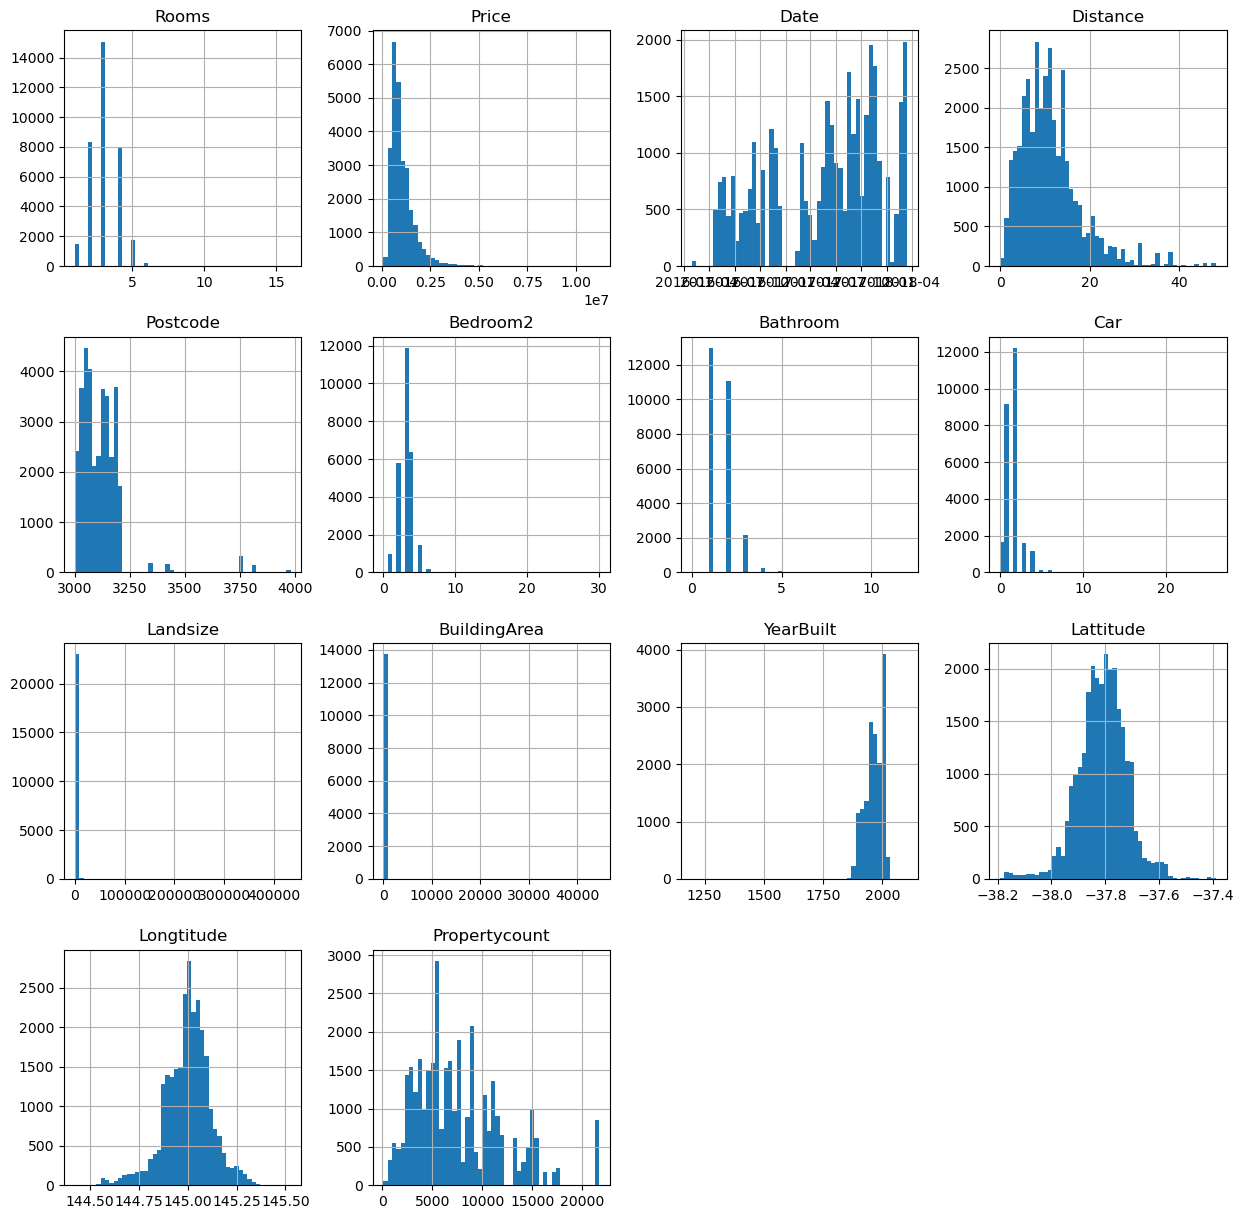

In [27]:
mel_full.hist(bins=50, figsize=(15,15))